In [105]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns

In [106]:
style.use('seaborn-muted')
style.use('seaborn-ticks')
style.use('seaborn-poster')
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['.SF NS Rounded']
# sns.set_style("ticks")
all_results = [pd.read_csv(f"timing_df_{i}.csv") for i in range(1, 2)]
# results = pd.concat(all_results)

In [107]:
# Convert to sns dataframe
sns_dfs = []

for results in all_results:
    mltrace_df = results[["start_date", "end_date", "mltrace_logging_times", "mltrace_metric_computation_times", "num_points"]].reset_index(drop=True)
    mltrace_df.rename(columns={"mltrace_logging_times": "logging_time", "mltrace_metric_computation_times": "metric_computation_time"}, inplace=True)
    mltrace_df["cumulative_num_points"] = mltrace_df["num_points"].cumsum()
    mltrace_df["method"] = "mltrace"

    prometheus_df = results[["start_date", "end_date", "prometheus_logging_times", "prometheus_metric_computation_times", "num_points"]].reset_index(drop=True)
    prometheus_df.rename(columns={"prometheus_logging_times": "logging_time", "prometheus_metric_computation_times": "metric_computation_time"}, inplace=True)
    prometheus_df["cumulative_num_points"] = prometheus_df["num_points"].cumsum()
    prometheus_df["method"] = "prometheus"
    
    postgres_df = results[["start_date", "end_date", "postgres_metric_computation_times", "num_points"]].reset_index(drop=True)
    postgres_df.rename(columns={"postgres_metric_computation_times": "metric_computation_time"}, inplace=True)
    postgres_df["cumulative_num_points"] = postgres_df["num_points"].cumsum()
    postgres_df["method"] = "postgres (timestamped-index)"

    sns_df = pd.concat([prometheus_df, postgres_df, mltrace_df]).reset_index(drop=True)
    sns_dfs.append(sns_df)

sns_df = pd.concat(sns_dfs).reset_index(drop=True)

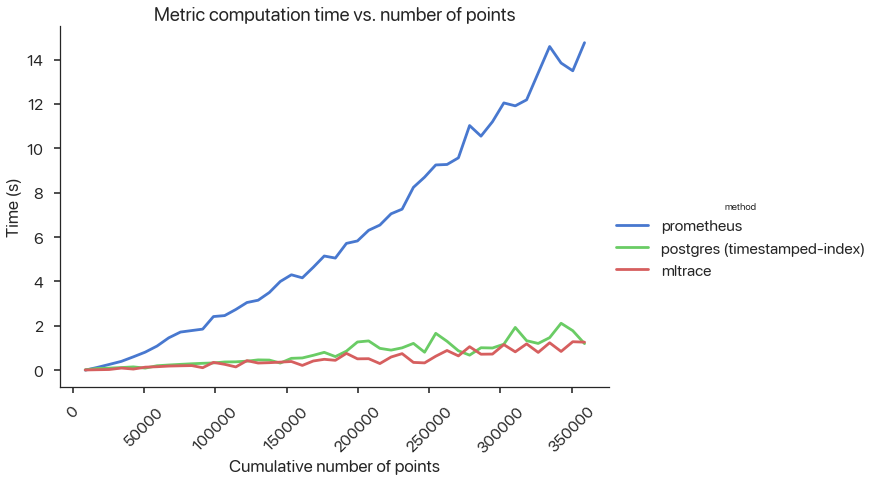

In [108]:
# Make plot

sns.relplot(x="cumulative_num_points", y="metric_computation_time", hue="method", data=sns_df, kind="line", height=6, aspect=1.5)
plt.title("Metric computation time vs. number of points")
plt.xlabel("Cumulative number of points")
plt.ylabel("Time (s)")
plt.xticks(rotation = 45) 
plt.show()

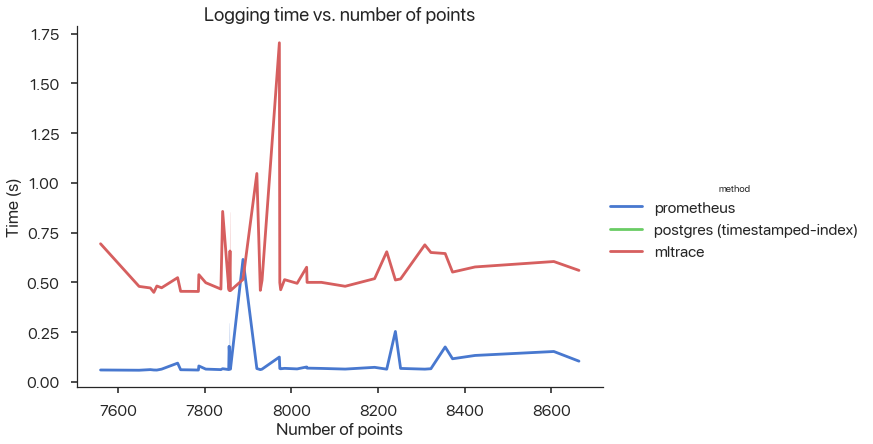

In [109]:
sns.relplot(x="num_points", y="logging_time", hue="method", data=sns_df, kind="line", height=6, aspect=1.5)
plt.xlabel("Number of points")
plt.ylabel("Time (s)")
plt.title("Logging time vs. number of points")
plt.show()